# Detection of kinks in fits and implication in science
## Failure of Error and Residuals to describe natural truth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
size = 50 # size of random data to be generated

In [3]:
def objective(x, m, c):
    """
    Objective function to generate random data and to fit to
    """
    y = m * x + c # Line
    return y

## Random Data

In [4]:
x0 = range(1,size+1)
y0 = np.random.rand(size)*10

In [5]:
popt,_ = curve_fit(objective,x0,y0)
y0_fit = objective(x0,popt[0],popt[1])

In [6]:
y0_offset = y0_fit + np.random.rand()*np.mean(y0_fit)

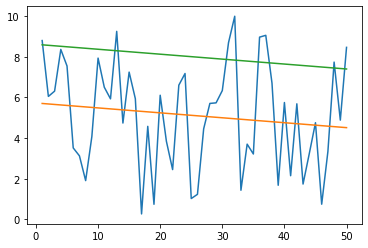

In [7]:
plt.plot(x0,y0)
plt.plot(x0,y0_fit)
plt.plot(x0,y0_offset)

### Residual sum of squares

In [8]:
rss_list = (y0 - y0_fit)**2
rss = np.sum(rss_list)
print("rss (fit)", rss)

rss_list = (y0 - y0_offset)**2
rss = np.sum(rss_list)
print("rss (offset)",rss)

rss (fit) 336.034350271524
rss (offset) 752.4229303941481


## Linear Fit

In [9]:
x1 = range(1,size+1)
y1 = objective(x1,np.random.rand(1),np.random.rand(1)) + np.random.rand(len(x1))*10

In [10]:
print(x1)
print(y1)

range(1, 51)
[10.24818468 10.15475837  1.92081864  3.86723861  9.94735386 10.5852242
  6.14798417  2.53931395  4.55555516  6.11912354  9.13236082  5.50243588
 12.84458432  9.0677074   9.82198039 11.81897536 12.72514142  7.59923901
 13.71223679  4.77512799 11.91561948 12.33138438  7.49980925  6.369592
 13.7728152  12.98848479  8.72023621 12.52587003  9.13312448 11.83139241
  9.60552112 10.86687337 12.18633661 13.25745637 13.36598621 13.47715306
 15.04200614  9.89884356 15.66861831 12.570608   17.00707348 12.00390832
 17.8520393   9.58694402 12.07889344 10.4558332  10.60348421 18.70068577
 14.11248318 19.22215739]


In [11]:
popt,_ = curve_fit(objective,x1,y1)
y1_fit = objective(x1,popt[0],popt[1])

In [12]:
y1_offset = y1_fit + np.random.rand()*np.mean(y1_fit)

### Residual sum of squares

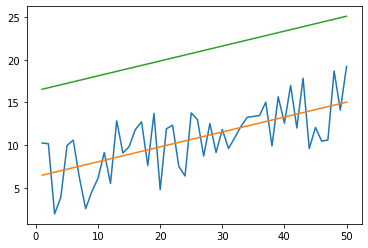

In [13]:
plt.plot(x1,y1)
plt.plot(x1,y1_fit)
plt.plot(x1,y1_offset)

### Residual sum of squares

In [14]:
rss_list = (y1 - y1_fit)**2
rss = np.sum(rss_list)
print("rss (fit)", rss)

rss_list = (y1 - y1_offset)**2
rss = np.sum(rss_list)
print("rss (offset)",rss)

rss (fit) 424.2525686504521
rss (offset) 5508.76148740014


# Univariate quadratic function

In [15]:
def objective(x, a, b, c):
    """
    Objective function to generate random data and to fit to
    """
    x2 = np.array([i**2 for i in x])
    y = a * x2 + b * x + c # Univariate quadratic function
    return y

In [16]:
# Data Creation
x2 = range(1,size+1)
y2 = objective(x2,np.random.rand(1),np.random.rand(1),np.random.rand(1)) + np.random.rand(len(x2))*100

In [17]:
# Fit
popt,_ = curve_fit(objective,x2,y2)
y2_fit = objective(x2,popt[0],popt[1],popt[2])

In [18]:
# Offset
y2_offset = y2_fit * 1.05

In [19]:
# Kink Introduction
amount = 2
positions = [int(size*np.random.rand()) for i in range(amount)]
if positions[0] == positions[1]:
    positions[1] += 1
print(np.sort(positions))

y2_kink = [i for i in y2_fit]
mean = np.mean(y2_fit)
for i in positions:
    y2_kink[i] +=  np.random.rand()*mean*0.5

[10 41]


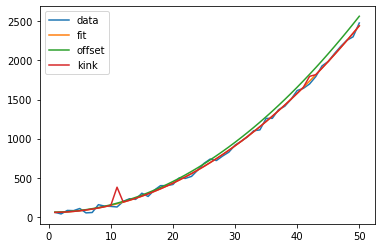

In [20]:
plt.plot(x2,y2,label='data')
plt.plot(x2,y2_fit,label='fit')
plt.plot(x2,y2_offset,label='offset')
plt.plot(x2,y2_kink,label='kink')
plt.legend()

In [21]:
rss_list = (y2 - y2_fit)**2
rss = np.sum(rss_list)
print("rss (fit)", rss)

rss_list = (y2 - y2_offset)**2
rss = np.sum(rss_list)
print("rss (offset)",rss)

rss_list = (y2 - y2_kink)**2
rss = np.sum(rss_list)
print("rss (kink)",rss)

rss (fit) 34269.70009176554
rss (offset) 194782.35047743988
rss (kink) 104794.25575907298


*in some cases "offset" might be more desirable for scientific reasons than the one presenting a kink*

*here, kink is introduced by the user, but need to show at least 1 case of occurence of non user-generated kink*